Importing Libraries

Read JSON File 

In [1]:
import json
stations_dataset = json.load(open('./dataset/stations.json'))
trains_dataset = json.load(open('./dataset/trains.json'))

In [2]:
import networkx as nx
G = nx.MultiDiGraph()

Adding Nodes

In [3]:
for station in stations_dataset["features"]:
    if station["geometry"]==None or station["properties"]==None or station["properties"]["state"]==None or station["properties"]["code"]==None or station["properties"]["name"]==None or station["properties"]["zone"]==None or station["properties"]["address"]==None:
        continue
    G.add_node(station["properties"]["code"], name=station["properties"]["name"], zone=station["properties"]["zone"], state=station["properties"]["state"])

No Of Nodes

In [4]:
G.number_of_nodes()

4270

Adding Edges

In [5]:
for train in trains_dataset["features"]:
    if train["geometry"]==None or train["properties"]==None or train["geometry"]["coordinates"]==None or train["properties"]["zone"]==None or train["properties"]["from_station_code"]==None or train["properties"]["duration_m"]==None or train["properties"]["number"]==None or train["properties"]["to_station_code"]==None or train["properties"]["duration_h"]==None or train["properties"]["distance"]==None:
        continue
    G.add_edge(train["properties"]["from_station_code"], train["properties"]["to_station_code"], distance=train["properties"]["distance"], minute=(train["properties"]["duration_h"]*60 + train["properties"]["duration_m"]), number=train["properties"]["number"])

Removing Nodes With Degree 0

In [6]:
l=list(G.nodes())
for n in l:
    if (G.degree(n)==0):
        G.remove_node(n)

Saving Graph

In [7]:
import pickle
print(type(G))
dbfile = open('graph_after_removing_zero_degree_nodes', 'ab')
pickle.dump(G, dbfile)                     
dbfile.close()

<class 'networkx.classes.multidigraph.MultiDiGraph'>


In [8]:
G.number_of_nodes()

747

Graph Visualisation

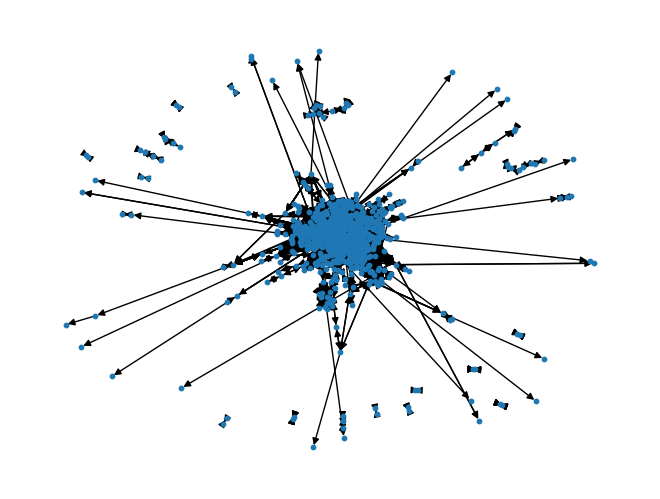

In [9]:
nx.draw(G, node_size=10)

In [10]:
import pickle
print(type(G))
dbfile = open('examplePickle', 'ab')
pickle.dump(G, dbfile)                     
dbfile.close()

dbfile = open('examplePickle', 'rb')     
G = pickle.load(dbfile)
dbfile.close()
print("hi")
print(type(G))

<class 'networkx.classes.multidigraph.MultiDiGraph'>
hi
<class 'networkx.classes.multidigraph.MultiDiGraph'>


Adjacency Matrix Of The Graph

In [11]:
import pandas as pd
df =pd.DataFrame(nx.adjacency_matrix(G, weight="distance").todense(), index=G.nodes(), columns=G.nodes())
df

,NZB,KMU,MNM,SNSI,DLJ,PBE,REWA,MBA,ELP,BGNA,...,MKC,BZU,RPR,HZD,KQR,PGMD,PWL,CTO,POY,RGV
NZB,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
KMU,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MNM,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SNSI,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DLJ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PGMD,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PWL,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CTO,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
POY,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Listing Busiest Station

In [12]:
l=list(G.degree(list(G.nodes())))
l.sort(key=lambda x: x[1], reverse=True)
l[:10] #top 10 nodes with highest degree (stations with most number of trains)

[('HWH', 263),
 ('NDLS', 160),
 ('MAS', 145),
 ('DLI', 139),
 ('MSB', 136),
 ('SBC', 117),
 ('ADI', 112),
 ('LPI', 108),
 ('HYB', 106),
 ('CSTM', 99)]

Calcualtion Of Shortest Path Length Using Distance And Time

In [13]:
shortestPathByDistanceTimeDF =pd.DataFrame( index=G.nodes(), columns=G.nodes())
for i in G.nodes():
    for j in G.nodes():
        if i==j:
            continue
        lst=[]
        try:
            lst.append(nx.shortest_path_length(G, source=i, target=j, weight="distance"))
        except nx.NetworkXNoPath:
            lst.append(None)
        try:
            lst.append(nx.shortest_path_length(G, source=i, target=j, weight="minute"))
        except nx.NetworkXNoPath:
            lst.append(None)
        
        shortestPathByDistanceTimeDF.loc[i,j] = lst

In [14]:
shortestPathByDistanceTimeDF

,NZB,KMU,MNM,SNSI,DLJ,PBE,REWA,MBA,ELP,BGNA,...,MKC,BZU,RPR,HZD,KQR,PGMD,PWL,CTO,POY,RGV
NZB,NaN,"[1363, 1735]","[1410, 1740]","[1174, 1625]","[2279, 3140]","[2305, 3060]","[1779, 2170]","[1783, 2745]","[None, None]","[None, None]",...,"[1076, 1765]","[1594, 1860]","[2343, 2895]","[2061, 2515]","[2246, 2740]","[1834, 2109]","[1932, 2380]","[873, 1040]","[2198, 2680]","[2480, 3215]"
KMU,"[1363, 1710]",NaN,"[912, 1115]","[2342, 3025]","[3463, 4750]","[3336, 4065]","[2589, 3665]","[2814, 3880]","[None, None]","[None, None]",...,"[2107, 2950]","[2144, 3380]","[3051, 3365]","[2746, 2970]","[2847, 2955]","[2865, 3254]","[2963, 3445]","[1904, 2225]","[1700, 2055]","[3150, 3566]"
MNM,"[1410, 1710]","[912, 1110]",NaN,"[2058, 2435]","[3274, 4390]","[3248, 3665]","[2400, 3075]","[2711, 3300]","[None, None]","[None, None]",...,"[2154, 2950]","[1955, 2845]","[2793, 3085]","[2524, 2690]","[2709, 2915]","[2895, 2664]","[2872, 2985]","[1951, 2225]","[1090, 1385]","[2947, 3390]"
SNSI,"[988, 1370]","[2192, 2744]","[2046, 2425]",NaN,"[2015, 2925]","[2334, 2965]","[1690, 1955]","[1846, 2325]","[None, None]","[None, None]",...,"[1694, 2072]","[1480, 1645]","[2409, 2515]","[2140, 2120]","[2264, 2345]","[1393, 1689]","[2067, 2502]","[1702, 2065]","[2834, 3260]","[2481, 2820]"
DLJ,"[2143, 2935]","[3347, 4325]","[3201, 4175]","[2015, 3015]",NaN,"[2472, 2950]","[2146, 2700]","[2067, 2780]","[None, None]","[None, None]",...,"[1949, 2055]","[1701, 2140]","[2815, 3505]","[2673, 3285]","[2485, 3225]","[2028, 2289]","[2102, 2270]","[2857, 3630]","[3989, 5115]","[2702, 3810]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PGMD,"[None, None]","[None, None]","[None, None]","[None, None]","[None, None]","[None, None]","[None, None]","[None, None]","[None, None]","[None, None]",...,"[None, None]","[None, None]","[None, None]","[None, None]","[None, None]",NaN,"[None, None]","[None, None]","[None, None]","[None, None]"
PWL,"[1924, 1921]","[2955, 3125]","[2872, 2806]","[1466, 1516]","[2102, 2260]","[488, 860]","[1253, 1351]","[684, 690]","[None, None]","[None, None]",...,"[998, 1010]","[1339, 1860]","[1343, 1645]","[1325, 1330]","[1112, 1135]","[138, 275]",NaN,"[2465, 2616]","[3660, 3746]","[1329, 1720]"
CTO,"[873, 1025]","[1904, 2235]","[1951, 2240]","[1963, 2450]","[3152, 4135]","[2846, 3745]","[2320, 2990]","[2324, 3285]","[None, None]","[None, None]",...,"[1617, 2265]","[2234, 2870]","[2907, 3580]","[2602, 3310]","[2787, 3535]","[2375, 2794]","[2473, 3065]",NaN,"[2739, 3180]","[3021, 4010]"
POY,"[2198, 2620]","[1700, 2020]","[1090, 1355]","[2846, 3196]","[4062, 4730]","[4036, 4575]","[3188, 3985]","[3499, 4210]","[None, None]","[None, None]",...,"[2942, 3860]","[2743, 3755]","[3581, 3995]","[3312, 3600]","[3497, 3825]","[3683, 3574]","[3660, 3895]","[2739, 3135]",NaN,"[3735, 4300]"


In [ ]:
print(type(shortestPathByDistanceTimeDF))

Saving Shortest Path

In [15]:
dbfile = open('shortestPathByDistanceTimeDF', 'ab')
pickle.dump(shortestPathByDistanceTimeDF, dbfile)                     
dbfile.close()

Centrality Measures For Each Nodes

Degree Centrality (DC)

In [16]:

nx.degree_centrality(G)

{'NZB': 0.0160857908847185,
 'KMU': 0.005361930294906166,
 'MNM': 0.002680965147453083,
 'SNSI': 0.028150134048257374,
 'DLJ': 0.002680965147453083,
 'PBE': 0.036193029490616625,
 'REWA': 0.0160857908847185,
 'MBA': 0.005361930294906166,
 'ELP': 0.002680965147453083,
 'BGNA': 0.002680965147453083,
 'NIR': 0.022788203753351208,
 'APDJ': 0.02546916890080429,
 'AWB': 0.005361930294906166,
 'SMNH': 0.00938337801608579,
 'CUPJ': 0.005361930294906166,
 'PBR': 0.032171581769437,
 'GRD': 0.0160857908847185,
 'AGTL': 0.010723860589812333,
 'SOG': 0.01742627345844504,
 'MBF': 0.005361930294906166,
 'CMNR': 0.013404825737265416,
 'DBB': 0.002680965147453083,
 'CPK': 0.005361930294906166,
 'CTA': 0.005361930294906166,
 'CTD': 0.005361930294906166,
 'CUR': 0.013404825737265416,
 'CWA': 0.04155495978552279,
 'FKA': 0.00804289544235925,
 'DJ': 0.012064343163538875,
 'BGS': 0.0013404825737265416,
 'ETAH': 0.005361930294906166,
 'GG': 0.010723860589812333,
 'DTR': 0.00804289544235925,
 'HNB': 0.0013404

Betweenness Centrality

In [17]:
nx.betweenness_centrality(G)

{'NZB': 0.0015487686456363246,
 'KMU': 0.0023840797452183457,
 'MNM': 0.0,
 'SNSI': 0.004039112898225571,
 'DLJ': 0.0,
 'PBE': 0.0059124287173072596,
 'REWA': 0.00029119241824061885,
 'MBA': 0.00011324730213555454,
 'ELP': 0.0,
 'BGNA': 0.0,
 'NIR': 0.002433490590871578,
 'APDJ': 0.002956170799033934,
 'AWB': 0.0,
 'SMNH': 0.00012313792524979526,
 'CUPJ': 0.0,
 'PBR': 0.007226385749329402,
 'GRD': 0.0024412755761575623,
 'AGTL': 0.000624546883276372,
 'SOG': 0.002522922601721677,
 'MBF': 1.8897734602625202e-05,
 'CMNR': 2.6397498746577842e-05,
 'DBB': 0.0,
 'CPK': 0.0,
 'CTA': 0.0023840797452183457,
 'CTD': 0.0,
 'CUR': 0.0023840797452183457,
 'CWA': 0.006831932235186185,
 'FKA': 5.331234379763385e-05,
 'DJ': 0.00237328391240981,
 'BGS': 0.0,
 'ETAH': 0.0,
 'GG': 0.0023840797452183457,
 'DTR': 0.0,
 'HNB': 0.0,
 'HRR': 0.0,
 'HMH': 0.0,
 'JND': 0.0023840797452183457,
 'JNO': 0.0,
 'STA': 3.5163636433241396e-05,
 'KKDI': 0.007137844791910323,
 'KLK': 0.0037360763291026176,
 'KRBA': 9.39

SHORTEST PATH

In [18]:
p=nx.shortest_path(G, source="HWH", target='CMNR', weight="l")
p

['HWH', 'BBS', 'TPTY', 'CMNR']

In [19]:
import pickle
dbfile = open('examplePickle', 'rb')     
G = pickle.load(dbfile)
dbfile.close()
print("hi")
print(type(G))

hi
<class 'networkx.classes.multidigraph.MultiDiGraph'>


In [20]:
print(G.nodes())

['NZB', 'KMU', 'MNM', 'SNSI', 'DLJ', 'PBE', 'REWA', 'MBA', 'ELP', 'BGNA', 'NIR', 'APDJ', 'AWB', 'SMNH', 'CUPJ', 'PBR', 'GRD', 'AGTL', 'SOG', 'MBF', 'CMNR', 'DBB', 'CPK', 'CTA', 'CTD', 'CUR', 'CWA', 'FKA', 'DJ', 'BGS', 'ETAH', 'GG', 'DTR', 'HNB', 'HRR', 'HMH', 'JND', 'JNO', 'STA', 'KKDI', 'KLK', 'KRBA', 'KNH', 'ABKP', 'MAE', 'MBO', 'ABS', 'MHI', 'MRJ', 'MV', 'MRIJ', 'MTM', 'SBC', 'NIL', 'ONR', 'PRLI', 'PLK', 'PUU', 'PRTN', 'RTGH', 'RHA', 'AWR', 'RTK', 'RIM', 'SBHR', 'SCL', 'SHM', 'SGRL', 'KXJ', 'CSTM', 'MAO', 'UDZ', 'UHP', 'VLR', 'ALY', 'UCR', 'VTL', 'ATT', 'DB', 'BARI', 'ANDN', 'BAKA', 'BBN', 'BHJ', 'DRD', 'BER', 'BGB', 'BKF', 'BHRB', 'BGM', 'BGU', 'BJP', 'BDE', 'BME', 'BLDI', 'BL', 'APH', 'BMPR', 'BJE', 'BRY', 'BNVD', 'BPO', 'BQA', 'BNKI', 'BSC', 'BTD', 'BDME', 'CDD', 'BXT', 'BHGJ', 'CG', 'CH', 'DDN', 'CDG', 'DLI', 'CHV', 'DJRZ', 'DMR', 'DLCR', 'DHI', 'DMH', 'DMV', 'DUMK', 'DUI', 'FN', 'FTD', 'TMLP', 'DBRG', 'JAT', 'TN', 'GBA', 'GDV', 'GEDE', 'GUV', 'CLT', 'GNC', 'GUA', 'GNPR', 'HAPA'

In [21]:
z=[]
# i=0
for i in G.nodes():
    z.append(i)
print(z)

['NZB', 'KMU', 'MNM', 'SNSI', 'DLJ', 'PBE', 'REWA', 'MBA', 'ELP', 'BGNA', 'NIR', 'APDJ', 'AWB', 'SMNH', 'CUPJ', 'PBR', 'GRD', 'AGTL', 'SOG', 'MBF', 'CMNR', 'DBB', 'CPK', 'CTA', 'CTD', 'CUR', 'CWA', 'FKA', 'DJ', 'BGS', 'ETAH', 'GG', 'DTR', 'HNB', 'HRR', 'HMH', 'JND', 'JNO', 'STA', 'KKDI', 'KLK', 'KRBA', 'KNH', 'ABKP', 'MAE', 'MBO', 'ABS', 'MHI', 'MRJ', 'MV', 'MRIJ', 'MTM', 'SBC', 'NIL', 'ONR', 'PRLI', 'PLK', 'PUU', 'PRTN', 'RTGH', 'RHA', 'AWR', 'RTK', 'RIM', 'SBHR', 'SCL', 'SHM', 'SGRL', 'KXJ', 'CSTM', 'MAO', 'UDZ', 'UHP', 'VLR', 'ALY', 'UCR', 'VTL', 'ATT', 'DB', 'BARI', 'ANDN', 'BAKA', 'BBN', 'BHJ', 'DRD', 'BER', 'BGB', 'BKF', 'BHRB', 'BGM', 'BGU', 'BJP', 'BDE', 'BME', 'BLDI', 'BL', 'APH', 'BMPR', 'BJE', 'BRY', 'BNVD', 'BPO', 'BQA', 'BNKI', 'BSC', 'BTD', 'BDME', 'CDD', 'BXT', 'BHGJ', 'CG', 'CH', 'DDN', 'CDG', 'DLI', 'CHV', 'DJRZ', 'DMR', 'DLCR', 'DHI', 'DMH', 'DMV', 'DUMK', 'DUI', 'FN', 'FTD', 'TMLP', 'DBRG', 'JAT', 'TN', 'GBA', 'GDV', 'GEDE', 'GUV', 'CLT', 'GNC', 'GUA', 'GNPR', 'HAPA'

In [22]:
print(type(z))

<class 'list'>


In [23]:
import pickle
with open('station.pkl', 'wb') as f:
    pickle.dump(z, f)

In [24]:
import pickle
with open('station.pkl', 'rb') as f:
    mynewlist = pickle.load(f)
print(type(mynewlist))

<class 'list'>


In [25]:
import pickle
with open('nodes.pkl', 'wb') as m:
    pickle.dump(G, m)

In [26]:
import pickle
with open('nodes.pkl', 'rb') as c:
    nod = pickle.load(c)
print(type(nod))

<class 'networkx.classes.multidigraph.MultiDiGraph'>


In [28]:
p=nx.shortest_path(nod, source="HWH", target='MAS', weight="l")
p

['HWH', 'MAS']

In [30]:
p=nx.shortest_path_length(nod, source="HWH", target='MAS', weight="distance")
p

1662

In [3]:
# H = nx.MultiDiGraph()
H = nx.complete_graph(5)
print(nx.clustering(H, 0))
print(nx.clustering(H))

1.0
{0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0}


In [39]:
import pickle
with open('nodes.pkl', 'rb') as c:
    nod = pickle.load(c)
P=[]
for s in nod.edges('HWH'):
    # print(s[1])
    if((nx.shortest_path_length(nod, source=s[0], target=s[1], weight="distance"))<200) and (s[1] not in P):
        P.append(s[1])
# P.sort
x=list(nod.degree(list(P)))
x.sort(key=lambda x: x[1], reverse=True)
# print(x)
dict2={}
for i in x:
    dict2[i]=nx.shortest_path_length(nod, source='HWH', target=i[0], weight="distance")
print(dict2)

{('PKU', 37): 71, ('BWN', 28): 107, ('KGP', 28): 115, ('DGHA', 11): 189, ('BHP', 4): 146, ('SIU', 2): 33, ('MYM', 2): 82, ('KIG', 2): 55, ('TAK', 2): 57, ('BOP', 1): 64}


In [10]:
#CSV To Dataframe
import pandas as pd
station_code = pd.read_csv('./dataset/AI&ACategoryStns.csv',  low_memory=False) 
station_code

,Sr No.,Name of Station,Stn Code,Division,Railway,State,Catg based on Pass earning of
0,1,CST Mumbai,CSTM,BB,CR,Maharashtra,A1
1,2,Lokmanya Tilak (T),LTT,BB,CR,Maharashtra,A1
2,3,Pune,PA,PA,CR,Maharashtra,A1
3,4,Nagpur,NGP,NGP,CR,Maharashtra,A1
4,5,Kalyan,KYN,BB,CR,Maharashtra,A1
...,...,...,...,...,...,...,...
407,328,Ujjain,WR,UJN,Ratlam,Madhya Pradesh,A
408,329,Valsad,WR,BL,Mumbai Ce,Gujarat,A
409,330,Vapi,WR,VAPI,Mumbai Ce,Gujarat,A
410,331,Veraval,WR,VRL,Bhavnagar,Gujarat,A


In [13]:
import csv
staton_name={}
with open ('./dataset/AI&ACategoryStns.csv', mode='r') as f:
    data = csv.reader(f)
    staton_name={rows[2]:rows[1] for rows in data}
print(type(staton_name)) 


<class 'dict'>


In [14]:
import pickle
with open('station_name.pkl', 'wb') as f:
    pickle.dump(staton_name, f)

In [15]:
import pickle
with open('station_name.pkl', 'rb') as f:
    stationname = pickle.load(f)
print(type(stationname))
print(stationname.values())

<class 'dict'>
dict_values(['Name of Station', 'CST Mumbai', 'Lokmanya Tilak (T)', 'Pune', 'Nagpur', 'Kalyan', 'Dadar', 'Thane', 'Solapur', 'Visakhapatnam', 'Bhubaneswar', 'Puri', 'Darbhanga Jn.', 'Dhanbad Jn.', 'Gaya Jn.', 'Mughalsarai Jn.', 'Muzaffarpur Jn.', 'Patna Jn.', 'BHAGALPUR', 'Howrah', 'SEALDAH', 'Allahabad', 'Kanpur Central', 'Jhansi', 'Gwalior', 'Agra Cantt', 'Mathura Jn', 'Gorakhpur Jn.', 'Lucknow Jn.', 'Chhapra Jn.', 'GUWAHATI', 'New Jalpaiguri', 'Jammu Tawi', 'Lucknow', 'Varanasi', 'DELHI JN.', 'NEW DELHI', 'Amritsar', 'Ludhiana', 'Ambala Cantt. Jn.', 'Haridwar', 'Chandigarh', 'H. NIZAMUDDIN', 'Anand Vihar Terminal', 'Bareilly', 'Dehradun', 'Jaipur', 'Jodhpur', 'Ajmer', 'SECUNDERABAD JN', 'VIJAYAWADA', 'TIRUPATI', 'HYDERABAD', 'KACHEGUDA', 'Raipur', 'Bilaspur Jn', 'Tatanagar', 'Kharagpur', 'Chennai central', 'Chennai egmore', 'Coimbatore jn', 'Tiruvananthapuram Central', 'Ernakulam jn', 'Madurai jn', 'Thrisur', 'Kozhikkode', 'Bangalore City', 'Yesvantpur', 'BHOPAL', 'JA

In [16]:
stationname['ASN']

'ASANSOL'

In [23]:
s=[i for i in staton_name if staton_name[i]=="New Jalpaiguri"]
s[0]

'NJP'

In [31]:
import networkx as nx
import pickle

In [33]:
with open('station_name.pkl', 'rb') as f:
    stationname = pickle.load(f)

In [39]:
s=[i for i in stationname if stationname[i]=="Chennai central"][0]
s

'MAS'

In [3]:
import pickle
with open('nodes.pkl', 'rb') as c:
    nod = pickle.load(c)
p = nx.shortest_path(nod ,source=[i for i in stationname if stationname[i]=="Howrah"][0],
                         target=[i for i in stationname if stationname[i]=="Chennai central"][0], weight="distance")
print(p)

NameError: name 'nx' is not defined

In [10]:
import pickle
with open('nodes.pkl', 'rb') as c:
    nod = pickle.load(c)
l=nod.number_of_nodes()
l
print(nod.nodes())

['NZB', 'KMU', 'MNM', 'SNSI', 'DLJ', 'PBE', 'REWA', 'MBA', 'ELP', 'BGNA', 'NIR', 'APDJ', 'AWB', 'SMNH', 'CUPJ', 'PBR', 'GRD', 'AGTL', 'SOG', 'MBF', 'CMNR', 'DBB', 'CPK', 'CTA', 'CTD', 'CUR', 'CWA', 'FKA', 'DJ', 'BGS', 'ETAH', 'GG', 'DTR', 'HNB', 'HRR', 'HMH', 'JND', 'JNO', 'STA', 'KKDI', 'KLK', 'KRBA', 'KNH', 'ABKP', 'MAE', 'MBO', 'ABS', 'MHI', 'MRJ', 'MV', 'MRIJ', 'MTM', 'SBC', 'NIL', 'ONR', 'PRLI', 'PLK', 'PUU', 'PRTN', 'RTGH', 'RHA', 'AWR', 'RTK', 'RIM', 'SBHR', 'SCL', 'SHM', 'SGRL', 'KXJ', 'CSTM', 'MAO', 'UDZ', 'UHP', 'VLR', 'ALY', 'UCR', 'VTL', 'ATT', 'DB', 'BARI', 'ANDN', 'BAKA', 'BBN', 'BHJ', 'DRD', 'BER', 'BGB', 'BKF', 'BHRB', 'BGM', 'BGU', 'BJP', 'BDE', 'BME', 'BLDI', 'BL', 'APH', 'BMPR', 'BJE', 'BRY', 'BNVD', 'BPO', 'BQA', 'BNKI', 'BSC', 'BTD', 'BDME', 'CDD', 'BXT', 'BHGJ', 'CG', 'CH', 'DDN', 'CDG', 'DLI', 'CHV', 'DJRZ', 'DMR', 'DLCR', 'DHI', 'DMH', 'DMV', 'DUMK', 'DUI', 'FN', 'FTD', 'TMLP', 'DBRG', 'JAT', 'TN', 'GBA', 'GDV', 'GEDE', 'GUV', 'CLT', 'GNC', 'GUA', 'GNPR', 'HAPA'

In [9]:
import pickle
with open('station_name.pkl', 'rb') as f:
    stationname = pickle.load(f)
print(type(stationname))
print(len(stationname))

<class 'dict'>
94


In [16]:
    import pandas as pd
    l = list(nod.degree(list(nod.nodes())))
    l.sort(key=lambda x: x[1], reverse=True)
    # top 10 nodes with highest degree (stations with most number of trains)
    dict3=l[:10]
    df = pd.DataFrame(dict3, columns=['Station', 'Distance From Main Station'])
    df

,Station,Distance From Main Station
0,HWH,263
1,NDLS,160
2,MAS,145
3,DLI,139
4,MSB,136
5,SBC,117
6,ADI,112
7,LPI,108
8,HYB,106
9,CSTM,99


In [3]:
import pickle
with open('shortestPathByDistanceTimeDF', 'rb') as c:
    nod = pickle.load(c)
nod

,NZB,KMU,MNM,SNSI,DLJ,PBE,REWA,MBA,ELP,BGNA,...,MKC,BZU,RPR,HZD,KQR,PGMD,PWL,CTO,POY,RGV
NZB,NaN,"[1363, 1735]","[1410, 1740]","[1174, 1625]","[2279, 3140]","[2305, 3060]","[1779, 2170]","[1783, 2745]","[None, None]","[None, None]",...,"[1076, 1765]","[1594, 1860]","[2343, 2895]","[2061, 2515]","[2246, 2740]","[1834, 2109]","[1932, 2380]","[873, 1040]","[2198, 2680]","[2480, 3215]"
KMU,"[1363, 1710]",NaN,"[912, 1115]","[2342, 3025]","[3463, 4750]","[3336, 4065]","[2589, 3665]","[2814, 3880]","[None, None]","[None, None]",...,"[2107, 2950]","[2144, 3380]","[3051, 3365]","[2746, 2970]","[2847, 2955]","[2865, 3254]","[2963, 3445]","[1904, 2225]","[1700, 2055]","[3150, 3566]"
MNM,"[1410, 1710]","[912, 1110]",NaN,"[2058, 2435]","[3274, 4390]","[3248, 3665]","[2400, 3075]","[2711, 3300]","[None, None]","[None, None]",...,"[2154, 2950]","[1955, 2845]","[2793, 3085]","[2524, 2690]","[2709, 2915]","[2895, 2664]","[2872, 2985]","[1951, 2225]","[1090, 1385]","[2947, 3390]"
SNSI,"[988, 1370]","[2192, 2744]","[2046, 2425]",NaN,"[2015, 2925]","[2334, 2965]","[1690, 1955]","[1846, 2325]","[None, None]","[None, None]",...,"[1694, 2072]","[1480, 1645]","[2409, 2515]","[2140, 2120]","[2264, 2345]","[1393, 1689]","[2067, 2502]","[1702, 2065]","[2834, 3260]","[2481, 2820]"
DLJ,"[2143, 2935]","[3347, 4325]","[3201, 4175]","[2015, 3015]",NaN,"[2472, 2950]","[2146, 2700]","[2067, 2780]","[None, None]","[None, None]",...,"[1949, 2055]","[1701, 2140]","[2815, 3505]","[2673, 3285]","[2485, 3225]","[2028, 2289]","[2102, 2270]","[2857, 3630]","[3989, 5115]","[2702, 3810]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PGMD,"[None, None]","[None, None]","[None, None]","[None, None]","[None, None]","[None, None]","[None, None]","[None, None]","[None, None]","[None, None]",...,"[None, None]","[None, None]","[None, None]","[None, None]","[None, None]",NaN,"[None, None]","[None, None]","[None, None]","[None, None]"
PWL,"[1924, 1921]","[2955, 3125]","[2872, 2806]","[1466, 1516]","[2102, 2260]","[488, 860]","[1253, 1351]","[684, 690]","[None, None]","[None, None]",...,"[998, 1010]","[1339, 1860]","[1343, 1645]","[1325, 1330]","[1112, 1135]","[138, 275]",NaN,"[2465, 2616]","[3660, 3746]","[1329, 1720]"
CTO,"[873, 1025]","[1904, 2235]","[1951, 2240]","[1963, 2450]","[3152, 4135]","[2846, 3745]","[2320, 2990]","[2324, 3285]","[None, None]","[None, None]",...,"[1617, 2265]","[2234, 2870]","[2907, 3580]","[2602, 3310]","[2787, 3535]","[2375, 2794]","[2473, 3065]",NaN,"[2739, 3180]","[3021, 4010]"
POY,"[2198, 2620]","[1700, 2020]","[1090, 1355]","[2846, 3196]","[4062, 4730]","[4036, 4575]","[3188, 3985]","[3499, 4210]","[None, None]","[None, None]",...,"[2942, 3860]","[2743, 3755]","[3581, 3995]","[3312, 3600]","[3497, 3825]","[3683, 3574]","[3660, 3895]","[2739, 3135]",NaN,"[3735, 4300]"


In [28]:
import pickle
with open('nearstation.pkl', 'wb') as m:
    pickle.dump(nod, m)

In [29]:
import pickle
with open('nearstation.pkl', 'rb') as c:
    near = pickle.load(c)
near

,NZB,KMU,MNM,SNSI,DLJ,PBE,REWA,MBA,ELP,BGNA,...,MKC,BZU,RPR,HZD,KQR,PGMD,PWL,CTO,POY,RGV
NZB,NaN,"[1363, 1735]","[1410, 1740]","[1174, 1625]","[2279, 3140]","[2305, 3060]","[1779, 2170]","[1783, 2745]","[None, None]","[None, None]",...,"[1076, 1765]","[1594, 1860]","[2343, 2895]","[2061, 2515]","[2246, 2740]","[1834, 2109]","[1932, 2380]","[873, 1040]","[2198, 2680]","[2480, 3215]"
KMU,"[1363, 1710]",NaN,"[912, 1115]","[2342, 3025]","[3463, 4750]","[3336, 4065]","[2589, 3665]","[2814, 3880]","[None, None]","[None, None]",...,"[2107, 2950]","[2144, 3380]","[3051, 3365]","[2746, 2970]","[2847, 2955]","[2865, 3254]","[2963, 3445]","[1904, 2225]","[1700, 2055]","[3150, 3566]"
MNM,"[1410, 1710]","[912, 1110]",NaN,"[2058, 2435]","[3274, 4390]","[3248, 3665]","[2400, 3075]","[2711, 3300]","[None, None]","[None, None]",...,"[2154, 2950]","[1955, 2845]","[2793, 3085]","[2524, 2690]","[2709, 2915]","[2895, 2664]","[2872, 2985]","[1951, 2225]","[1090, 1385]","[2947, 3390]"
SNSI,"[988, 1370]","[2192, 2744]","[2046, 2425]",NaN,"[2015, 2925]","[2334, 2965]","[1690, 1955]","[1846, 2325]","[None, None]","[None, None]",...,"[1694, 2072]","[1480, 1645]","[2409, 2515]","[2140, 2120]","[2264, 2345]","[1393, 1689]","[2067, 2502]","[1702, 2065]","[2834, 3260]","[2481, 2820]"
DLJ,"[2143, 2935]","[3347, 4325]","[3201, 4175]","[2015, 3015]",NaN,"[2472, 2950]","[2146, 2700]","[2067, 2780]","[None, None]","[None, None]",...,"[1949, 2055]","[1701, 2140]","[2815, 3505]","[2673, 3285]","[2485, 3225]","[2028, 2289]","[2102, 2270]","[2857, 3630]","[3989, 5115]","[2702, 3810]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PGMD,"[None, None]","[None, None]","[None, None]","[None, None]","[None, None]","[None, None]","[None, None]","[None, None]","[None, None]","[None, None]",...,"[None, None]","[None, None]","[None, None]","[None, None]","[None, None]",NaN,"[None, None]","[None, None]","[None, None]","[None, None]"
PWL,"[1924, 1921]","[2955, 3125]","[2872, 2806]","[1466, 1516]","[2102, 2260]","[488, 860]","[1253, 1351]","[684, 690]","[None, None]","[None, None]",...,"[998, 1010]","[1339, 1860]","[1343, 1645]","[1325, 1330]","[1112, 1135]","[138, 275]",NaN,"[2465, 2616]","[3660, 3746]","[1329, 1720]"
CTO,"[873, 1025]","[1904, 2235]","[1951, 2240]","[1963, 2450]","[3152, 4135]","[2846, 3745]","[2320, 2990]","[2324, 3285]","[None, None]","[None, None]",...,"[1617, 2265]","[2234, 2870]","[2907, 3580]","[2602, 3310]","[2787, 3535]","[2375, 2794]","[2473, 3065]",NaN,"[2739, 3180]","[3021, 4010]"
POY,"[2198, 2620]","[1700, 2020]","[1090, 1355]","[2846, 3196]","[4062, 4730]","[4036, 4575]","[3188, 3985]","[3499, 4210]","[None, None]","[None, None]",...,"[2942, 3860]","[2743, 3755]","[3581, 3995]","[3312, 3600]","[3497, 3825]","[3683, 3574]","[3660, 3895]","[2739, 3135]",NaN,"[3735, 4300]"


In [30]:
type(near)

pandas.core.frame.DataFrame

In [50]:
n=near['HWH']
n




[1838, 2170]

In [19]:
n=nod['HWH']


NZB     [1838, 2170]
KMU     [2484, 2625]
MNM     [2176, 2345]
SNSI    [1792, 1775]
DLJ     [2640, 3120]
            ...     
PGMD    [None, None]
PWL     [1493, 1105]
CTO     [2379, 2965]
POY     [2964, 3255]
RGV      [771, 1005]
Name: HWH, Length: 747, dtype: object

In [78]:
l=[]
for idx, x in enumerate(near):
    try:
        l.append((x, int(n[idx][0])))
    except:
        pass
    # print(n[idx][0], x)

In [79]:
l

[('NZB', 1838),
 ('KMU', 2484),
 ('MNM', 2176),
 ('SNSI', 1792),
 ('DLJ', 2640),
 ('PBE', 1332),
 ('REWA', 1185),
 ('MBA', 1227),
 ('NIR', 1411),
 ('APDJ', 732),
 ('AWB', 2163),
 ('SMNH', 2522),
 ('CUPJ', 2205),
 ('PBR', 2551),
 ('GRD', 839),
 ('AGTL', 1591),
 ('SOG', 1908),
 ('MBF', 2142),
 ('CMNR', 2150),
 ('DBB', 1510),
 ('CPK', 1108),
 ('CTA', 1932),
 ('CUR', 1868),
 ('CWA', 1278),
 ('FKA', 1871),
 ('ETAH', 1333),
 ('GG', 2632),
 ('HNB', 420),
 ('HRR', 2023),
 ('HMH', 2375),
 ('JND', 2771),
 ('JNO', 1325),
 ('STA', 1167),
 ('KKDI', 2115),
 ('KLK', 1716),
 ('KRBA', 1613),
 ('ABKP', 1103),
 ('MBO', 1177),
 ('ABS', 2489),
 ('MHI', 826),
 ('MRJ', 2203),
 ('MV', 2024),
 ('MTM', 1255),
 ('SBC', 1964),
 ('NIL', 2258),
 ('ONR', 2190),
 ('PRLI', 2299),
 ('PLK', 1295),
 ('PUU', 2485),
 ('RHA', 801),
 ('AWR', 1443),
 ('RTK', 1165),
 ('SBHR', 2590),
 ('SCL', 1394),
 ('SHM', 979),
 ('SGRL', 888),
 ('CSTM', 1964),
 ('MAO', 2729),
 ('UDZ', 1920),
 ('UHP', 1993),
 ('VLR', 1801),
 ('ALY', 809),
 ('

In [82]:
l.sort(key=lambda x: x[1], reverse=False)

In [83]:
l

[('SIU', 33),
 ('KIG', 55),
 ('TAK', 57),
 ('PKU', 71),
 ('MYM', 82),
 ('BWN', 105),
 ('BHP', 146),
 ('DGHA', 189),
 ('ASN', 200),
 ('RPH', 207),
 ('SURI', 211),
 ('AZ', 217),
 ('ADRA', 241),
 ('GUA', 250),
 ('TATA', 250),
 ('DHN', 258),
 ('PRR', 280),
 ('SNDT', 285),
 ('BHW', 286),
 ('GMO', 287),
 ('KWAE', 290),
 ('CRP', 292),
 ('JSME', 311),
 ('CKP', 312),
 ('BDME', 317),
 ('MLDT', 331),
 ('SBG', 339),
 ('BKSC', 340),
 ('JAJ', 355),
 ('MURI', 359),
 ('DUMK', 383),
 ('KGP', 385),
 ('BRKA', 387),
 ('KQR', 391),
 ('BBN', 398),
 ('RNC', 399),
 ('KIUL', 408),
 ('ROU', 413),
 ('HNB', 420),
 ('SDAH', 420),
 ('JGM', 423),
 ('HTE', 423),
 ('BLGT', 435),
 ('SPR', 436),
 ('BBS', 439),
 ('DKAE', 442),
 ('MDLE', 443),
 ('BGP', 443),
 ('JMP', 453),
 ('MKA', 455),
 ('GAYA', 457),
 ('KUR', 458),
 ('CG', 465),
 ('LAD', 466),
 ('DH', 479),
 ('BAKA', 496),
 ('LAK', 498),
 ('PURI', 502),
 ('JSG', 514),
 ('HLZ', 522),
 ('NMKA', 528),
 ('PNBE', 531),
 ('GEDE', 536),
 ('DBG', 536),
 ('DNR', 541),
 ('DOS', 

In [53]:

for i in near:
    # h=(near[i][0])
    # print(h)
    print(i)


NZB
KMU
MNM
SNSI
DLJ
PBE
REWA
MBA
ELP
BGNA
NIR
APDJ
AWB
SMNH
CUPJ
PBR
GRD
AGTL
SOG
MBF
CMNR
DBB
CPK
CTA
CTD
CUR
CWA
FKA
DJ
BGS
ETAH
GG
DTR
HNB
HRR
HMH
JND
JNO
STA
KKDI
KLK
KRBA
KNH
ABKP
MAE
MBO
ABS
MHI
MRJ
MV
MRIJ
MTM
SBC
NIL
ONR
PRLI
PLK
PUU
PRTN
RTGH
RHA
AWR
RTK
RIM
SBHR
SCL
SHM
SGRL
KXJ
CSTM
MAO
UDZ
UHP
VLR
ALY
UCR
VTL
ATT
DB
BARI
ANDN
BAKA
BBN
BHJ
DRD
BER
BGB
BKF
BHRB
BGM
BGU
BJP
BDE
BME
BLDI
BL
APH
BMPR
BJE
BRY
BNVD
BPO
BQA
BNKI
BSC
BTD
BDME
CDD
BXT
BHGJ
CG
CH
DDN
CDG
DLI
CHV
DJRZ
DMR
DLCR
DHI
DMH
DMV
DUMK
DUI
FN
FTD
TMLP
DBRG
JAT
TN
GBA
GDV
GEDE
GUV
CLT
GNC
GUA
GNPR
HAPA
HPT
HLZ
AII
HRF
HSR
HYB
HMT
JAM
HW
INDM
JBP
JRBM
JDNX
JMNR
JTTN
JSM
JLR
KAVI
KGM
KDBM
KMC
KPV
KODR
VR
KWF
KTNA
LAK
KYI
LEDO
LGL
LPNR
MFR
MAJN
MDLE
MDGR
MHOW
MLSR
MKP
MKI
MLN
MVJ
MUT
MTC
MQ
NCR
MZL
MXN
MTP
NDAE
NED
NHM
RJU
NMKA
NKE
NSL
NRW
NTSK
NMA
NS
OKHA
NTW
PRDP
PGTN
PNVL
PIT
PRG
RAL
PRES
RMO
RE
RMR
QLM
RGD
RUJ
RRB
RMM
ROK
RRS
SIU
RUSD
SDLP
SHC
SHTT
SGUJ
SIKR
SMQL
SLI
SKTN
SNDT
SOE
SSA
TEN
TCN
TRG
TK
TLGP
THE
T

In [24]:
#sort based on minutes
blank={}
for i in n:
    blank[i]=n[i]
blank

IndexError: positional indexers are out-of-bounds